<a href="https://colab.research.google.com/github/nhatchung14/PythonNotebooks/blob/master/3_randomForest_Exercises_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive
drive.mount('/gdrive')

%cd /gdrive/'My Drive'/'Colab Notebooks'/Lab7/3-random-forest

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Colab Notebooks/Lab7/3-random-forest


# Random Forest Assignment

## Use RandomForest for the Iris dataset
- dataset: 'Iris.csv'


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold


In [0]:
df = pd.read_csv('Iris.csv')

## Data observation

In [17]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


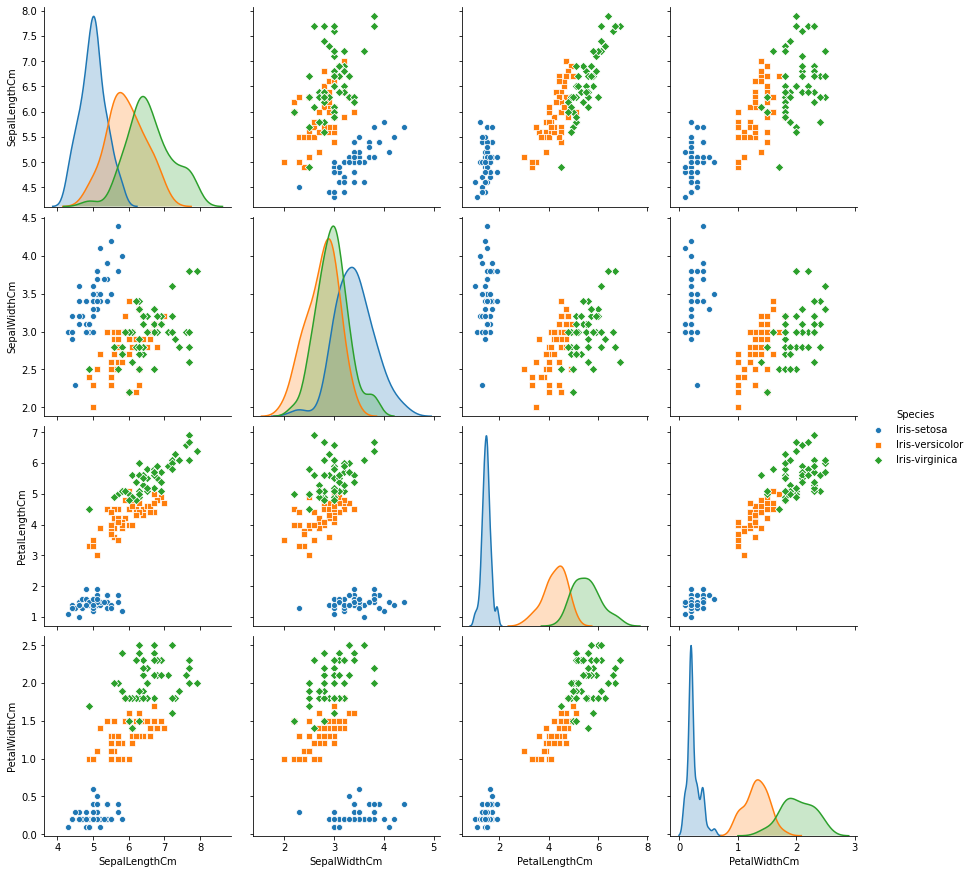

In [18]:
sns.pairplot(df.drop("Id", axis=1), hue = "Species", height=3, markers=["o", "s", "D"])   # Iris.csv
plt.show()

# Feature processing

In [0]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = df[feature_columns].values
y = df['Species'].values

In [0]:
# Map the labels
y = LabelEncoder().fit_transform(y)

## Forest training

In [21]:
rf = RandomForestClassifier(criterion='entropy', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)

rf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

## Evaluation

### Overall

In [22]:
acc_decision_tree = round(rf.score(X, y) * 100, 2)
print("--Train precision:\n" , acc_decision_tree)

y_pred = rf.predict(X)
print("--Confusion matrix:\n", confusion_matrix(y, y_pred))
print("--Classification report:\n", classification_report(y, y_pred))

--Train precision:
 98.0
--Confusion matrix:
 [[50  0  0]
 [ 0 47  3]
 [ 0  0 50]]
--Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.94      0.97        50
           2       0.94      1.00      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



### Stratified K-Fold Cross-Validation

In [23]:
skf = StratifiedKFold(n_splits=10)

fold_accuracy = []
for train_ind, valid_ind in skf.split(X, y):
  x_train, y_train  = X[train_ind], y[train_ind]
  x_val, y_val      = X[valid_ind], y[valid_ind]

  model = rf.fit(X=x_train, y=y_train) # We fit the model with the fold train data
  valid_acc = model.score(X=x_val, y=y_val)# We calculate accuracy with the fold validation data

  fold_accuracy.append(valid_acc)

avg = sum(fold_accuracy)/len(fold_accuracy)
print('Cross-validation score is ', avg)

Cross-validation score is  0.9600000000000002
